Dataset loaded successfully!

Objective 1: Analyzing Movies vs. TV Shows distribution...


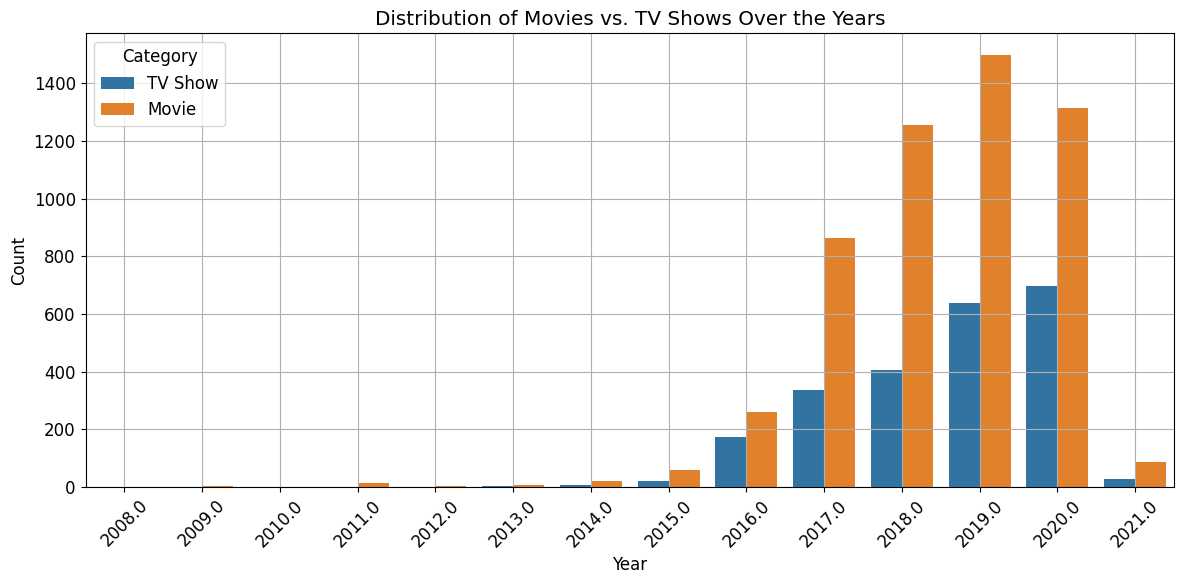

Generated 'movies_vs_tvshows_over_years.png'

Objective 2: Analyzing genre popularity...


/tmp/ipython-input-970575619.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_genres.values, y=top_15_genres.index, palette='viridis')


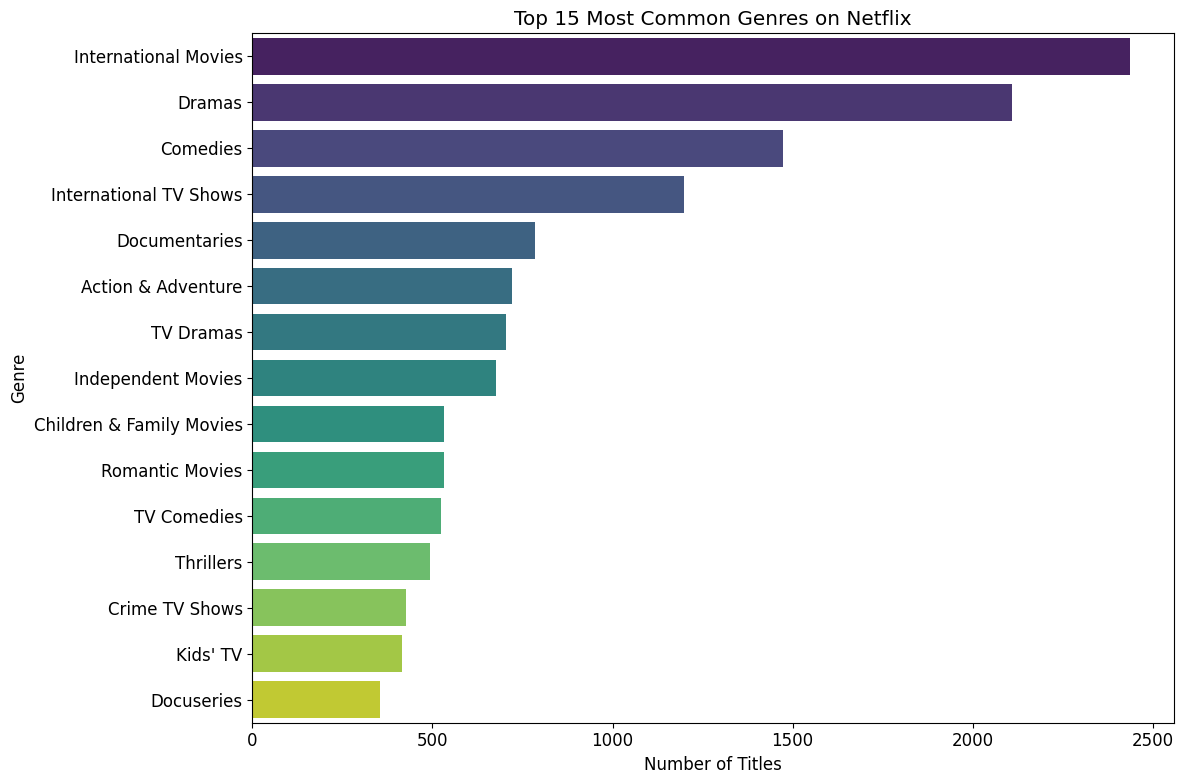

Generated 'top_genres.png'


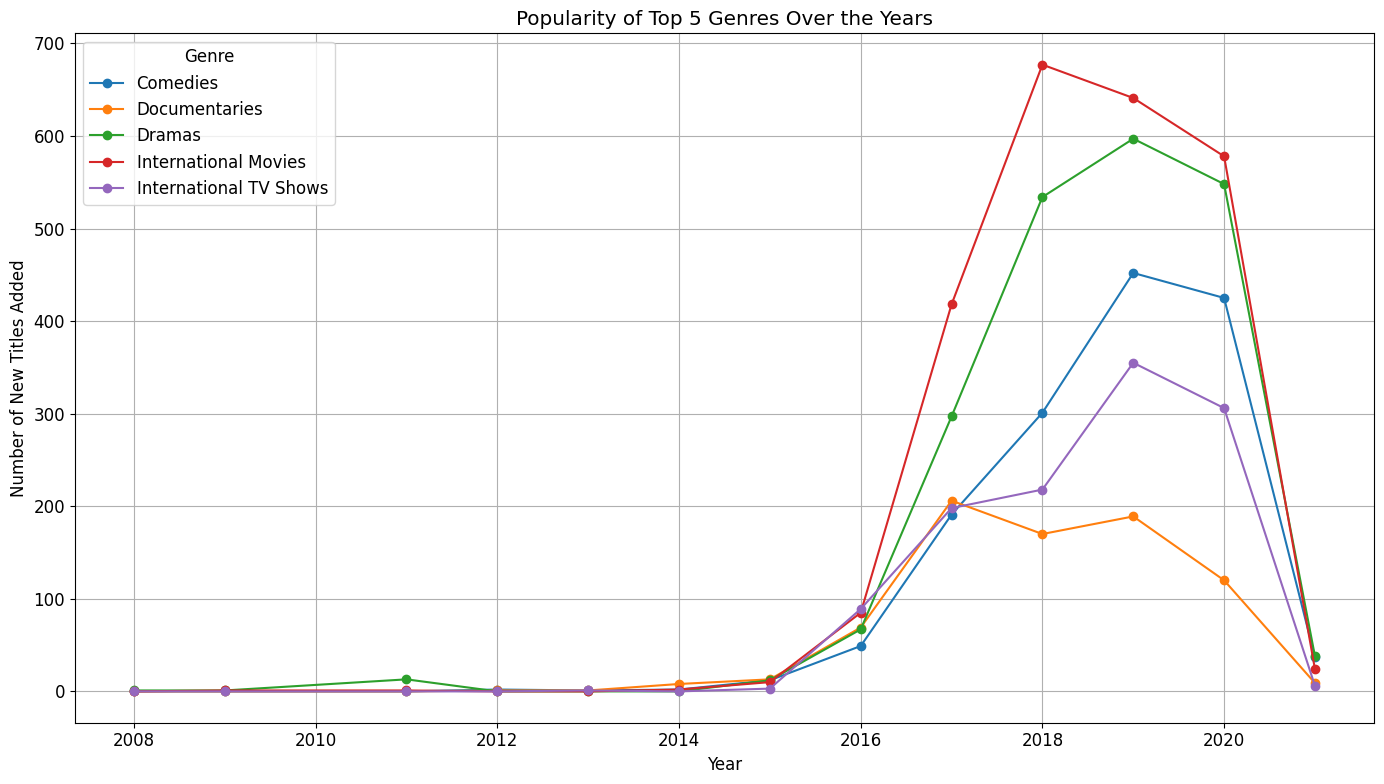

Generated 'genre_popularity_over_years.png'

Objective 3: Analyzing country-wise contributions...


/tmp/ipython-input-970575619.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette='mako')


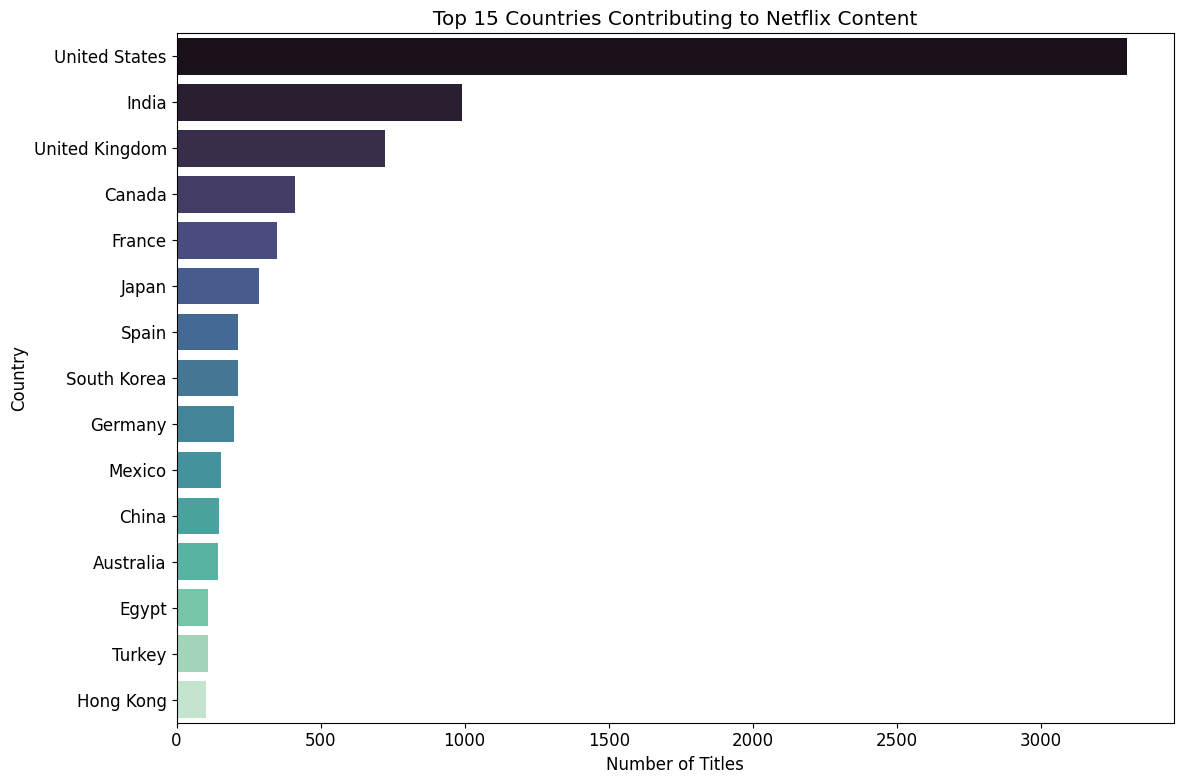

Generated 'top_countries.png'


In [53]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Dataset ---
# Load the Netflix dataset from a CSV file.
# Make sure to upload your 'Netflix Dataset.csv' file to your Colab environment.
try:
    df = pd.read_csv('Netflix Dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Netflix Dataset.csv' not found. Please upload the dataset to your Colab environment.")
    # Create a dummy dataframe to avoid further errors in the script.
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Data Cleaning and Preprocessing ---

    # Convert 'Release_Date' to datetime objects for time-based analysis.
    # We use 'coerce' to turn any unparseable dates into 'NaT' (Not a Time).
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

    # Extract the year from the 'Release_Date' to a new 'release_year' column.
    df['release_year'] = df['Release_Date'].dt.year

    # --- 3. Objective 1: Analyze the distribution of Movies vs. TV Shows over the years ---

    print("\nObjective 1: Analyzing Movies vs. TV Shows distribution...")

    plt.figure(figsize=(12, 6))
    sns.countplot(x='release_year', hue='Category', data=df)
    plt.title('Distribution of Movies vs. TV Shows Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('movies_vs_tvshows_over_years.png')
    plt.show()
    print("Generated 'movies_vs_tvshows_over_years.png'")


    # --- 4. Objective 2: Identify the most common genres and how their popularity has changed ---

    print("\nObjective 2: Analyzing genre popularity...")

    # Split the 'Type' column to handle multiple genres for a single title.
    genres_series = df['Type'].str.split(', ').explode()

    # Calculate the counts of the top 15 genres.
    top_15_genres = genres_series.value_counts().nlargest(15)

    # Plot the top 15 most common genres using a barplot.
    # This is the corrected plotting code.
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_15_genres.values, y=top_15_genres.index, palette='viridis')
    plt.title('Top 15 Most Common Genres on Netflix')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.savefig('top_genres.png')
    plt.show()
    print("Generated 'top_genres.png'")

    # Analyze how the popularity of the top 5 genres has changed over the years.
    top_5_genre_names = top_15_genres.index[:5]

    # Filter the exploded genre series to only include the top 5 genres
    genre_yearly_df = df.assign(genre=df['Type'].str.split(', ')).explode('genre')
    genre_yearly_filtered = genre_yearly_df[genre_yearly_df['genre'].isin(top_5_genre_names)]

    # Create a summary table of genre counts per year
    genre_popularity = genre_yearly_filtered.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

    # Plot the popularity of the top 5 genres over time.
    genre_popularity.plot(kind='line', figsize=(14, 8), marker='o')
    plt.title('Popularity of Top 5 Genres Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of New Titles Added')
    plt.grid(True)
    plt.legend(title='Genre')
    plt.tight_layout()
    plt.savefig('genre_popularity_over_years.png')
    plt.show()
    print("Generated 'genre_popularity_over_years.png'")


    # --- 5. Objective 3: Compare country-wise contributions to Netflix’s catalog ---

    print("\nObjective 3: Analyzing country-wise contributions...")

    # Split the 'Country' column to handle multiple countries and count contributions.
    countries = df['Country'].dropna().str.split(', ').explode()
    top_15_countries = countries.value_counts().nlargest(15)

    # Plot the top 15 contributing countries.
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette='mako')
    plt.title('Top 15 Countries Contributing to Netflix Content')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.savefig('top_countries.png')
    plt.show()
    print("Generated 'top_countries.png'")